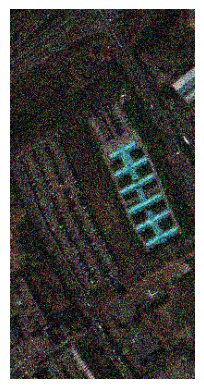

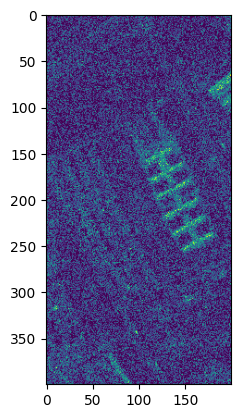

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist
import scipy.io as sio
from keras.models import Model
import tensorflow as tf


dname="sigma50eta0PaviaU"
fname="DATA/hsi_data/Demo/"+dname+".mat"
data = sio.loadmat(fname)
img_clean_np = data["image"].astype(np.float32)
img_noisy_np = data["image_noisy"].astype(np.float32)
sigmaest = data["sigma2"].astype(np.float32)

showband=[57,27,17]
plt.imshow(np.clip(img_noisy_np[:,:,showband],0,1))
# plt.imshow(img_clean_crop[:,:,showband])
plt.axis("off")
plt.show()

img_noisy=img_noisy_np.reshape(1,img_noisy_np.shape[0],img_noisy_np.shape[1],img_noisy_np.shape[2])
img_clean=img_clean_np.reshape(1,img_clean_np.shape[0],img_clean_np.shape[1],img_clean_np.shape[2])

plt.imshow(np.clip(img_noisy[0][:,:,1],0,1))



In [2]:

img_noisy.shape

(1, 400, 200, 103)

In [3]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

In [4]:
model = Sequential([
                    # encoder network
                    Conv2D(128, 3, activation='relu', padding='same', input_shape=(400, 200, 103)),
                    MaxPooling2D(2, padding='same'),
                    Conv2D(64, 3, activation='relu', padding='same'),
                    MaxPooling2D(2, padding='same'),
                    # decoder network
                    Conv2D(64, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    Conv2D(128, 3, activation='relu', padding='same'),
                    UpSampling2D(2),
                    # output layer
                    Conv2D(103, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 400, 200, 128)     118784    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 200, 100, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 100, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 100, 50, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 50, 64)       36928     
                                                                 
 up_sampling2d (UpSampling2D  (None, 200, 100, 64)     0

In [12]:
# train the model
model.fit(img_noisy, img_clean, epochs=300, batch_size=256, validation_data=(img_noisy, img_clean))

Epoch 1/300
1/1 [==============================] - 6s 6s/step - loss: 0.4808 - val_loss: 0.4868
Epoch 2/300
1/1 [==============================] - 5s 5s/step - loss: 0.4868 - val_loss: 0.4821
Epoch 3/300
1/1 [==============================] - 5s 5s/step - loss: 0.4821 - val_loss: 0.4711
Epoch 4/300
1/1 [==============================] - 5s 5s/step - loss: 0.4711 - val_loss: 0.4689
Epoch 5/300
1/1 [==============================] - 5s 5s/step - loss: 0.4689 - val_loss: 0.4668
Epoch 6/300
1/1 [==============================] - 5s 5s/step - loss: 0.4668 - val_loss: 0.4609
Epoch 7/300
1/1 [==============================] - 5s 5s/step - loss: 0.4609 - val_loss: 0.4635
Epoch 8/300
1/1 [==============================] - 5s 5s/step - loss: 0.4635 - val_loss: 0.4592
Epoch 9/300
1/1 [==============================] - 5s 5s/step - loss: 0.4592 - val_loss: 0.4584
Epoch 10/300
1/1 [==============================] - 5s 5s/step - loss: 0.4584 - val_loss: 0.4596
Epoch 11/300
1/1 [=====================

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 400, 200, 128)     118784    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 200, 100, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 100, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 100, 50, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 50, 64)       36928     
                                                                 
 up_sampling2d (UpSampling2D  (None, 200, 100, 64)     0

In [19]:
model.save('Path/to/the/folder/model_300.h5')

1/1 [==============================] - 1s 566ms/step


(-0.5, 199.5, 399.5, -0.5)

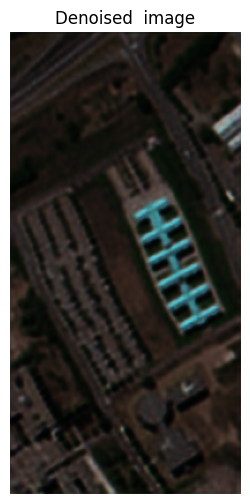

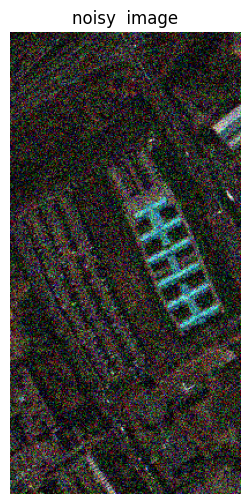

In [18]:
# predict the results from model (get compressed images)
pred = model.predict(img_noisy)
fig1, (ax) = plt.subplots(figsize=(3,6))
showband=[57,27,17]
ax.imshow(np.clip(pred[0][:,:,showband],0,1))
ax.set_title("Denoised  image")
ax.axis("off")

fig2, (an) = plt.subplots(figsize=(3,6))
showband=[57,27,17]
an.imshow(np.clip(img_noisy[0][:,:,showband],0,1))
an.set_title("noisy  image")
an.axis("off")

In [16]:
def calculate_psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    max_pixel = np.max(image1)
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

calculate_psnr(pred, img_clean)

25.789237022399902

In [17]:
calculate_psnr(img_noisy, img_clean)

18.266417980194092

In [ ]:
import skimage.metrics as metrics

ssim = metrics.structural_similarity(img_noisy, img_clean)
print("SSIM noisy: {:.4f}".format(ssim))

ssim = metrics.structural_similarity(pred, img_clean)
print("SSIM pred: {:.4f}".format(ssim))

1/1 [==============================] - 1s 747ms/step


(-0.5, 199.5, 399.5, -0.5)

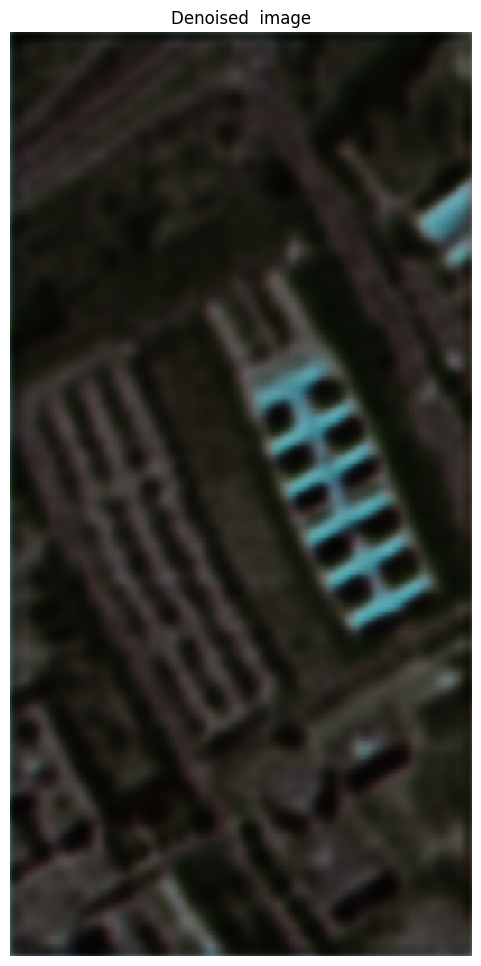

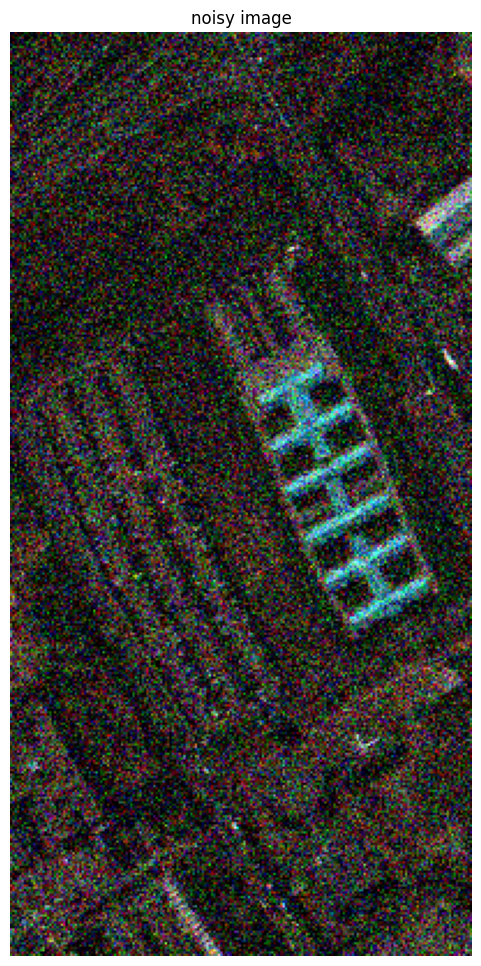

In [38]:
import tensorflow as tf
from tensorflow import keras
from keras import models
new_model = tf.keras.models.load_model('Pat/to/model/model_300.h5')
prediction=new_model.predict(img_noisy)
fig1, (ax) = plt.subplots(figsize=(6,12))
showband=[57,27,17]
ax.imshow(np.clip(prediction[0][:,:,showband],0,1))
ax.set_title("Denoised  image")
ax.axis("off")
fig2, (ar) = plt.subplots(figsize=(6,12))
showband=[57,27,17]
ar.imshow(np.clip(img_noisy[0][:,:,showband],0,1))
# plt.imshow(img_clean_crop[:,:,showband])
ar.set_title("noisy image")
ar.axis("off")